In [2]:
import numpy as np
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint
import math
from statsmodels.tsa.arima.model import ARIMA

#import csvs
train = pd.read_csv("../../data/train.csv")
test = pd.read_csv("../../data/test.csv")
graph = pd.read_csv("../../data/graph.csv")

statesdata = {}
states = pd.Series.unique(train['Province_State'])
num_states = len(states)
for s in states:
    statesdata[s] = train.loc[train['Province_State'] == s ,:]

In [3]:
s = states[1]
a = statesdata[s]
a = a.reset_index()
confirmed = a['Confirmed']
deaths = a['Deaths']

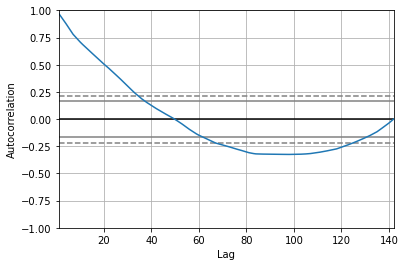

In [4]:
# looking for lag
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(deaths)
pyplot.show()

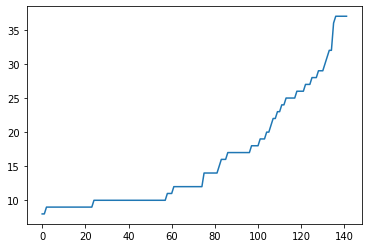

In [5]:
# finding out magnitude
deaths.plot()
pyplot.show()

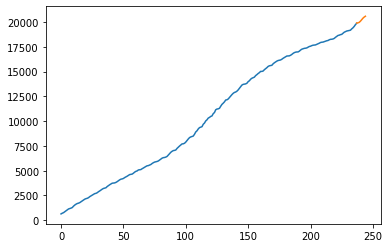

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# DESCRIPTION:
# STATE_NO: 1-> Alabama, 4-> California, etc.
# plot_confirmed-> True if you want to plot cases, false if you want to plot deaths
def sanity_plot(training_path, prediction_path, state_no, plot_confirmed=True):
    train_df = pd.read_csv(training_path)
    pred_df = pd.read_csv(prediction_path)
    result_train = train_df[['Deaths']]
    if plot_confirmed:
        result_train = train_df[['Confirmed']]
    result_pred = pred_df[['Deaths']]
    if plot_confirmed:
        result_pred = pred_df[['Confirmed']]
    state_train = np.array(result_train.iloc[state_no::50]).ravel()
    state_pred = np.array(result_pred.iloc[state_no::50]).ravel()
    plt.plot(np.arange(len(state_train)), state_train)
    plt.plot([237, 238, 239, 240, 241, 242, 243, 244], state_pred)
    plt.show()


sanity_plot("../SVM_round2/modified_train.csv", "../ARIMA/team25_round2.csv", 4, False)

# If you want to plot all 50:
# for i in range(50):
#     sanity_plot("../SVM_round2/modified_train.csv", "../Final_SVM/team25.csv", i)
